In [1]:
import pandas as pd

In [2]:
data = pd.read_csv(r"C:\Users\akhsh\Downloads\Electric_Production.csv")

In [3]:
import pandas as pd
import numpy as np 
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

import warnings
warnings.filterwarnings('ignore')

from statsmodels.tsa.stattools import adfuller
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.stattools import acf, pacf
from statsmodels.tsa.arima_model import ARIMA

In [4]:
data

,DATE,Value
0,01-01-1985,72.5052
1,02-01-1985,70.6720
2,03-01-1985,62.4502
3,04-01-1985,57.4714
4,05-01-1985,55.3151
...,...,...
392,09-01-2017,98.6154
393,10-01-2017,93.6137
394,11-01-2017,97.3359
395,12-01-2017,114.7212


In [5]:
from datetime import datetime
data['DATE']=pd.to_datetime(data['DATE'],infer_datetime_format=True)

In [6]:
elecomind = data.set_index('DATE',inplace=False)

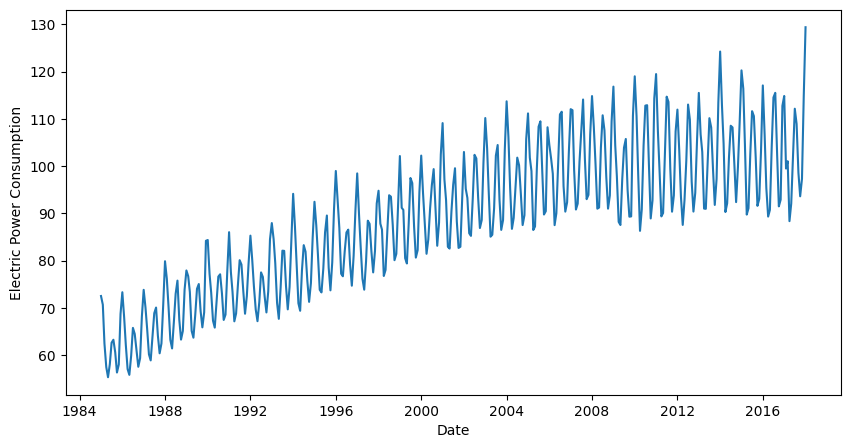

In [7]:
plt.figure(figsize=(10,5))
plt.xlabel('Date')
plt.ylabel('Electric Power Consumption')
plt.plot(elecomind)

In [8]:
timeseries = elecomind.copy()

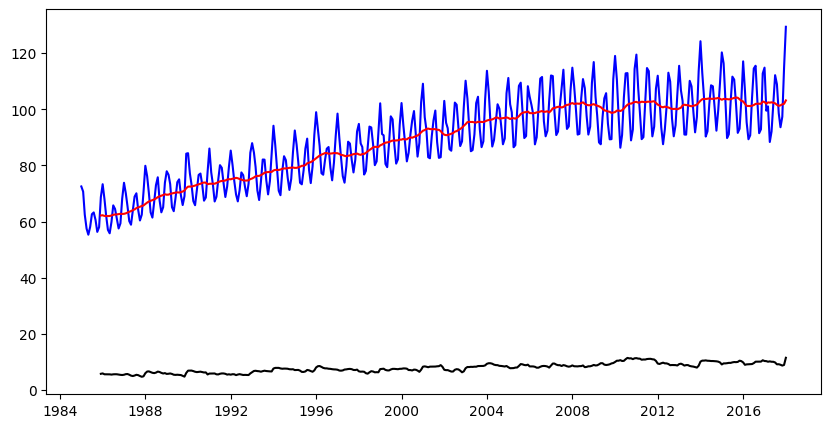

DFT:
Test Statistic                  -2.256990
p-value                          0.186215
#Lags Used                      15.000000
Number of Observations Used    381.000000
Critical Value (1%)             -3.447631
Critical Value (5%)             -2.869156
Critical Value (10%)            -2.570827
dtype: float64


In [9]:
movingAverage = timeseries.rolling(window=12).mean()
movingSTD = timeseries.rolling(window=12).std()

plt.figure(figsize=(10,5))
plt.plot(timeseries, color='blue', label='Original')
plt.plot(movingAverage, color='red', label='Rolling Mean')
plt.plot(movingSTD, color='black', label='Rolling Std')
plt.show(block=False)

print('DFT:')
elecom_test = adfuller(timeseries['Value'], autolag='AIC')
dfoutput = pd.Series(elecom_test[0:4], index=['Test Statistic','p-value','#Lags Used','Number of Observations Used'])
for key,value in elecom_test[4].items():
    dfoutput['Critical Value (%s)'%key] = value
print(dfoutput)

In [10]:
data = np.log(elecomind)

In [11]:
rollmean_log = data.rolling(window=12).mean()
rollstd_log = data.rolling(window=12).std()

In [12]:
data = data - rollmean_log

In [13]:
data.dropna(inplace=True)

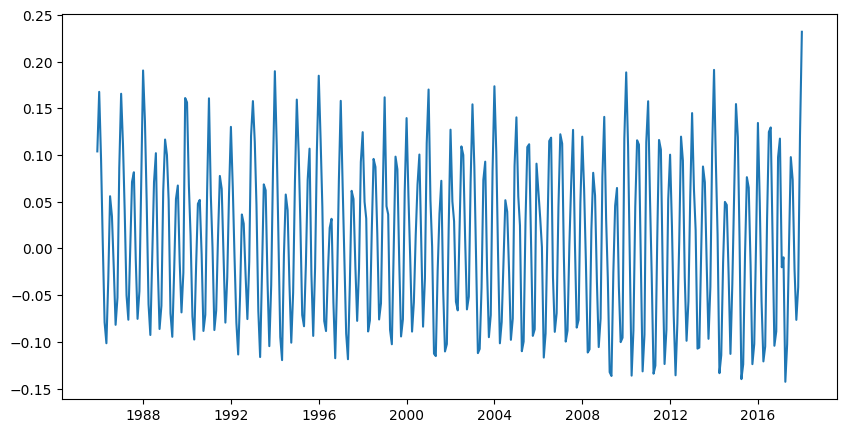

In [14]:
daata = data - data.shift()
plt.figure(figsize=(10,5))
plt.plot(data)

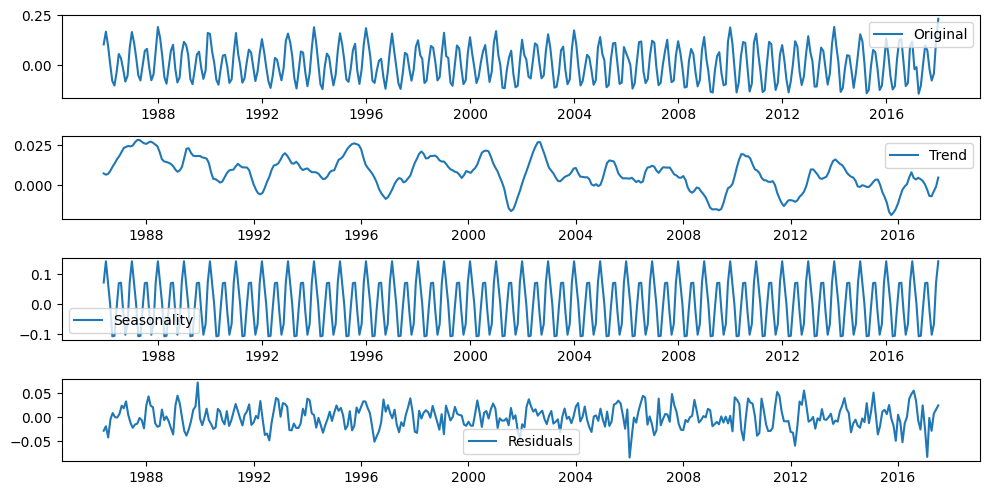

In [15]:
decomposition = seasonal_decompose(data)

trend = decomposition.trend
seasonal = decomposition.seasonal
residual = decomposition.resid

plt.figure(figsize=(10,5))
plt.subplot(411)
plt.plot(data, label='Original')
plt.legend(loc='best')

plt.subplot(412)
plt.plot(trend, label='Trend')
plt.legend(loc='best')

plt.subplot(413)
plt.plot(seasonal,label='Seasonality')
plt.legend(loc='best')

plt.subplot(414)
plt.plot(residual, label='Residuals')
plt.legend(loc='best')
plt.tight_layout()

In [16]:
elecom_decompose = residual
elecom_decompose.dropna(inplace=True)

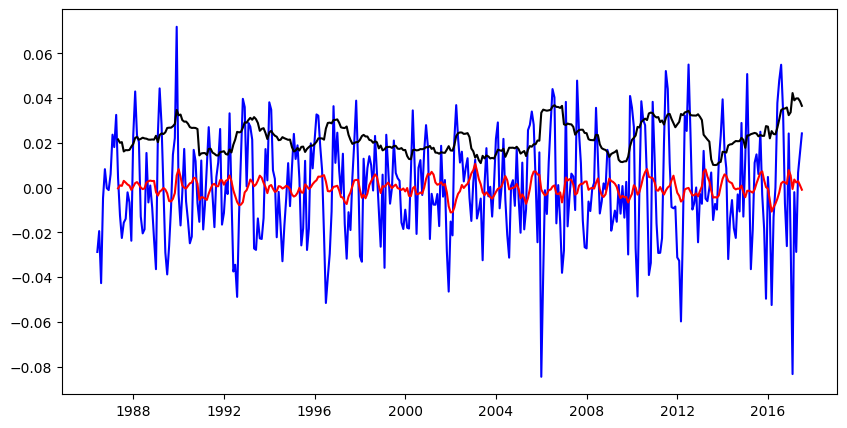

In [17]:
rollmean_decompose = elecom_decompose.rolling(window=12).mean()
rollstd_decompose = elecom_decompose.rolling(window=12).std()

plt.figure(figsize=(10,5))
plt.plot(elecom_decompose, color='blue')
plt.plot(rollmean_decompose, color='red')
plt.plot(rollstd_decompose, color='black')

In [18]:
lag_acf = acf(data, nlags=20)
lag_pacf = pacf(data, nlags=20, method='ols')

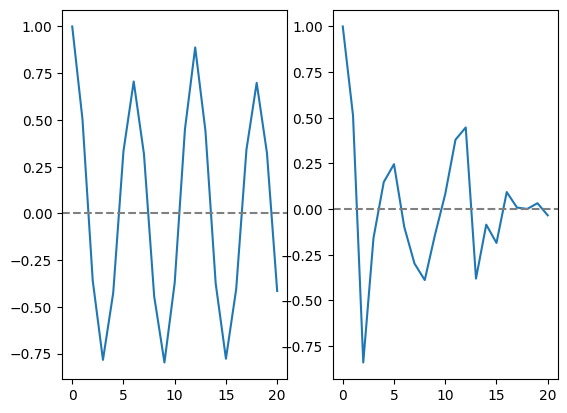

In [19]:

plt.subplot(121)
plt.plot(lag_acf)
plt.axhline(y=0, linestyle='--', color='gray')

plt.subplot(122)
plt.plot(lag_pacf)
plt.axhline(y=0, linestyle='--', color='gray')

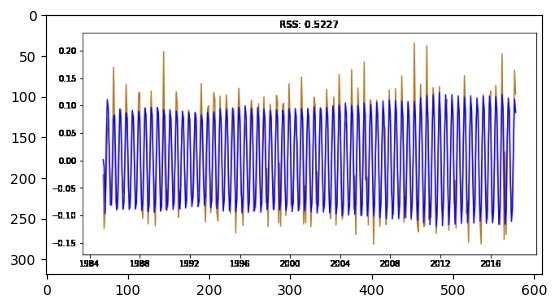

In [21]:
model1 = ARIMA(data, order=(3,1,0))
results_AR = model1.fit(disp=-1)
plt.figure(figsize=(10,5))
plt.plot(elecom_log_diff)
plt.plot(results_AR.fittedvalues, color='red')
plt.title('RSS: %.4f'%sum((results_AR.fittedvalues - elecom_log_diff['Value'])**2))
print('Plotting AR model')